In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", sep=',', encoding='latin-1')
df.head() #displaying head values

<ipython-input-26-d108e35a3704>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", sep=',', encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


 **LETS SELECT THE COLUMNS WHICH WE WANT TO ANALYZE**

In [28]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [29]:
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','targtype1_txt',
        'gname','weaptype1_txt','dbsource']]

In [30]:
df.shape

(114374, 11)

In [31]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS


In [32]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      1
dbsource           1
dtype: int64

In [33]:
df.describe()

,eventid,iyear,imonth,iday
count,1.143740e+05,114374.000000,114374.000000,114374.000000
mean,1.995460e+11,1995.393770,6.439121,15.321620
std,1.168661e+09,11.686701,3.405855,8.822325
min,1.970000e+11,1970.000000,0.000000,0.000000
25%,1.986070e+11,1986.000000,4.000000,8.000000
50%,1.994090e+11,1994.000000,6.000000,15.000000
75%,2.008022e+11,2008.000000,9.000000,23.000000
max,2.013021e+11,2013.000000,12.000000,31.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114374 entries, 0 to 114373
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          114374 non-null  int64 
 1   iyear            114374 non-null  int64 
 2   imonth           114374 non-null  int64 
 3   iday             114374 non-null  int64 
 4   country_txt      114374 non-null  object
 5   region_txt       114374 non-null  object
 6   attacktype1_txt  114374 non-null  object
 7   targtype1_txt    114374 non-null  object
 8   gname            114374 non-null  object
 9   weaptype1_txt    114373 non-null  object
 10  dbsource         114373 non-null  object
dtypes: int64(4), object(7)
memory usage: 9.6+ MB


**Lets see source wise terroirst Attacks**

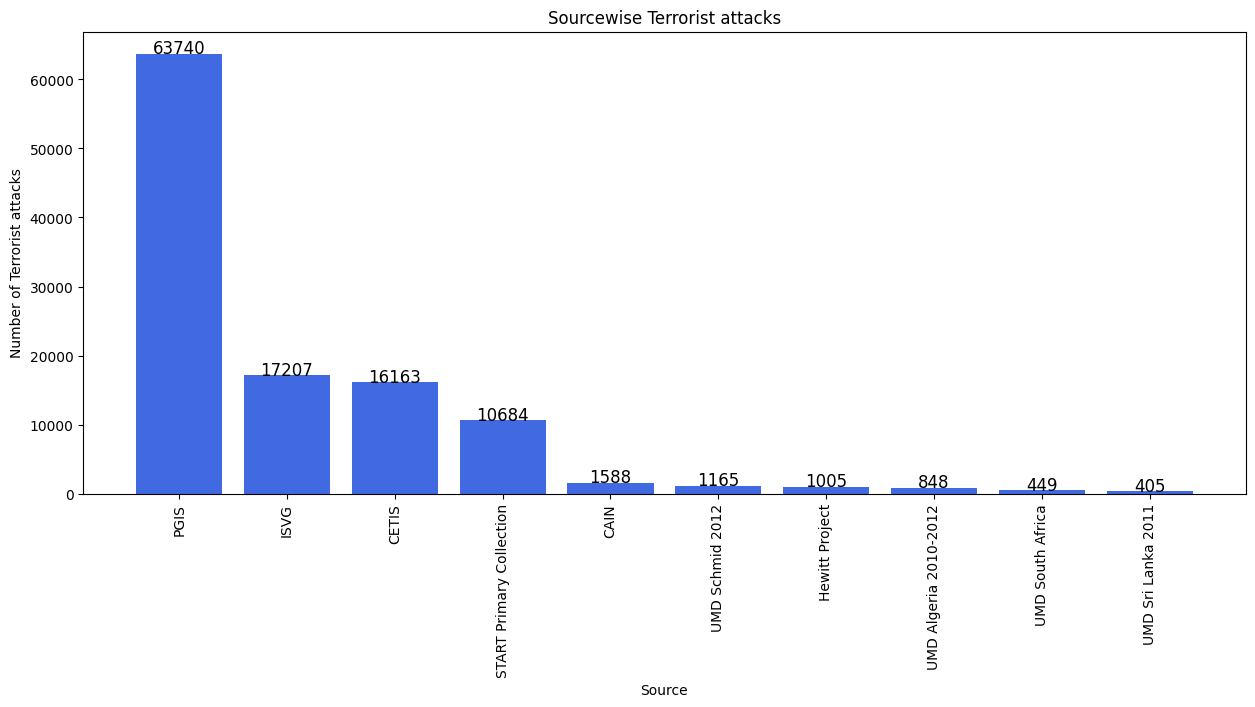

In [35]:
plt.figure(figsize=(15,6))
plt.bar(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10].values,color='royalblue')
#set the axis labels and title
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
#rotate the x-axis labels for better visibility
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
#show the plot
plt.show()

**REGION WISE TERRORIST ATTACKS**

In [36]:
df.region_txt.value_counts()

South Asia                     24192
Middle East & North Africa     23315
South America                  18048
Western Europe                 15310
Central America & Caribbean    10319
Sub-Saharan Africa              8335
Southeast Asia                  7137
North America                   3158
Eastern Europe                  3109
East Asia                        701
Central Asia                     514
Australasia & Oceania            236
Name: region_txt, dtype: int64

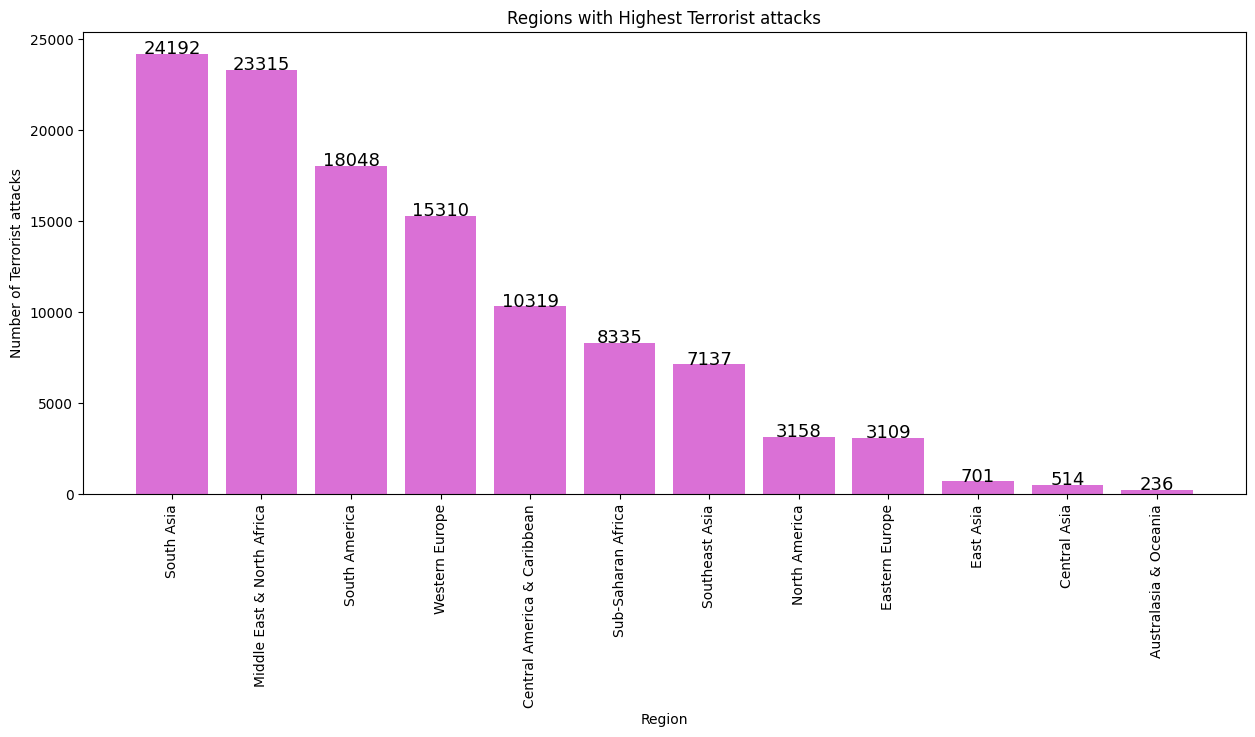

In [37]:
plt.figure(figsize=(15,6))
plt.bar(df.region_txt.value_counts().index,df.region_txt.value_counts().values,color='orchid')

#set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')
#rotate the x-axis labels for better visibility

plt.xticks(rotation=90)
for i, v in enumerate(df.region_txt.value_counts().values):
    plt.text(df.region_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

**Top 10 country with Highest Terrorism**

In [38]:
df.country_txt.value_counts()[:10]

Iraq              9422
India             7604
Colombia          7601
Pakistan          7430
Peru              6053
El Salvador       5320
United Kingdom    4672
Afghanistan       4608
Philippines       3667
Spain             3233
Name: country_txt, dtype: int64

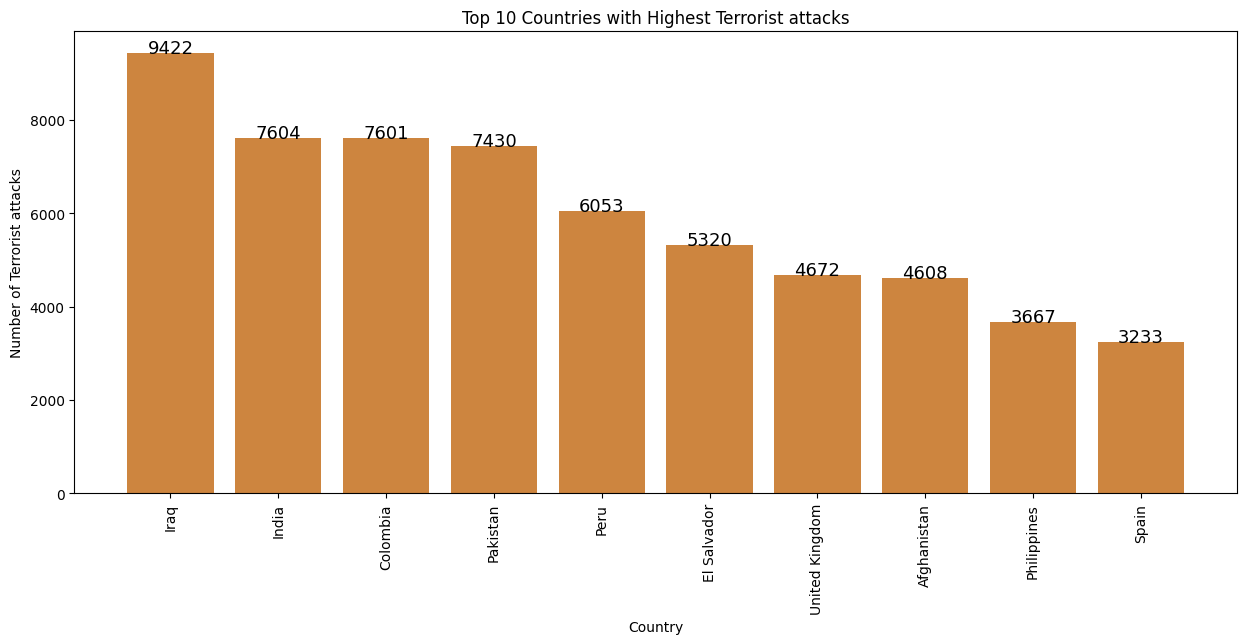

In [39]:
plt.figure(figsize=(15,6))
plt.bar(df.country_txt.value_counts()[:10].index,df.country_txt.value_counts()[:10].values,color='peru')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 Countries with Highest Terrorist attacks')
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:10].values):
    plt.text(df.country_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
plt.show()

**Most common types of terrorist Attacks**

In [40]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      53562
Armed Assault                          27421
Assassination                          15053
Facility/Infrastructure Attack          6942
Hostage Taking (Kidnapping)             5978
Unknown                                 3611
Hostage Taking (Barricade Incident)      695
Unarmed Assault                          657
Hijacking                                455
Name: attacktype1_txt, dtype: int64

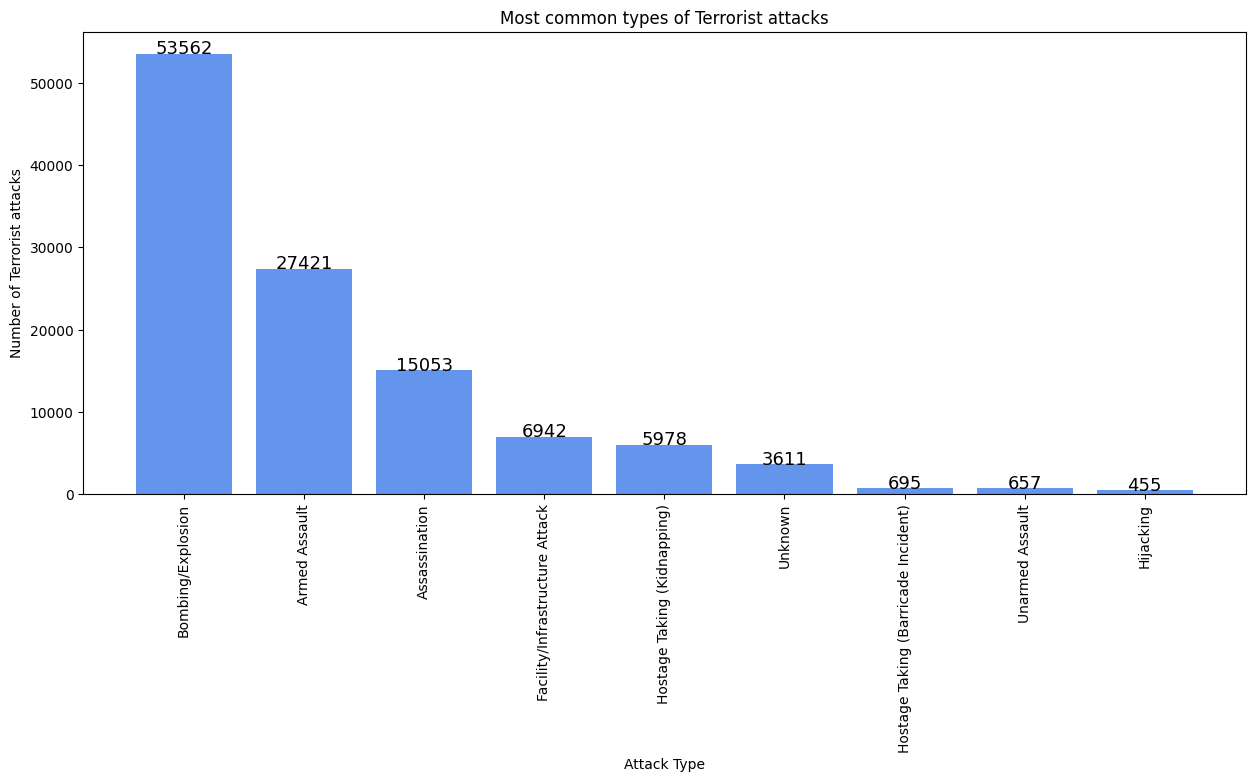

In [41]:
plt.figure(figsize=(15,6))
plt.bar(df.attacktype1_txt.value_counts().index,df.attacktype1_txt.value_counts().values,color='cornflowerblue')

plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
plt.show()

<h3> Most Attacked

In [42]:
print("Most Attacked")
print("Country : ",df['country_txt'].value_counts().idxmax())
print('Region :',df['region_txt'].value_counts().idxmax())
print('Year : ',df['iyear'].value_counts().idxmax())
print('Month : ',df['imonth'].value_counts().idxmax())
print('Type: ',df['attacktype1_txt'].value_counts().idxmax())


Most Attacked
Country :  Iraq
Region : South Asia
Year :  2012
Month :  5
Type:  Bombing/Explosion


Conclusion: Iraq is the most affected Country

<h3> Number of Attacks as per year

In [43]:
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values

iyear
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3456
1995    3081
1996    3058
1997    3197
1998     934
1999    1395
2000    1814
2001    1906
2002    1333
2003    1278
2004    1166
2005    2017
2006    2758
2007    3242
2008    4805
2009    4721
2010    4826
2011    5076
2012    8522
2013    1074
Name: eventid, dtype: int64

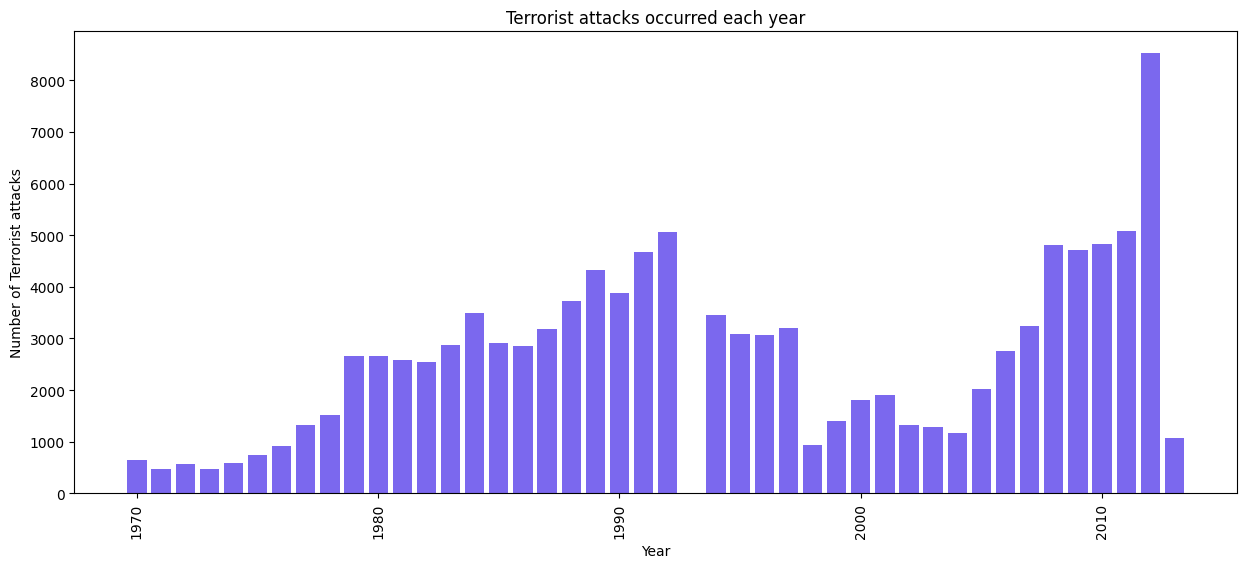

In [44]:
plt.figure(figsize=(15,6))
plt.bar(highest_values.index, highest_values.values,color='mediumslateblue')

plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occurred each year')

plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
plt.show()

Conclusion: Since 2010 the attacks have been more compared to previous years

COMPARING THE TERRIORIST ATTACK BEFORE AND AFTER 2010

In [49]:
new_row = pd.DataFrame(data = {
    'year' : ['Before 2010','After 2010'],
    'value' : [df[df.iyear < 2011].shape[0],df[df.iyear >= 2011].shape[0]]
})
new_row = new_row.set_index('year')
new_row

,value
year,
Before 2010,99702
After 2010,14672


In [52]:
df_after_2011 = df[df.iyear > 2010]
df_after_2011.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
99702,201101010001,2011,1,1,Egypt,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Army of Islam,Explosives,ISVG
99703,201101010003,2011,1,1,Iraq,Middle East & North Africa,Assassination,Police,Unknown,Firearms,ISVG
99704,201101010004,2011,1,1,Iraq,Middle East & North Africa,Bombing/Explosion,Government (General),Unknown,Explosives,ISVG
99705,201101010005,2011,1,1,Nigeria,Sub-Saharan Africa,Facility/Infrastructure Attack,Religious Figures/Institutions,Boko Haram,Incendiary,ISVG
99706,201101020001,2011,1,2,Iraq,Middle East & North Africa,Armed Assault,Government (General),Unknown,Firearms,ISVG


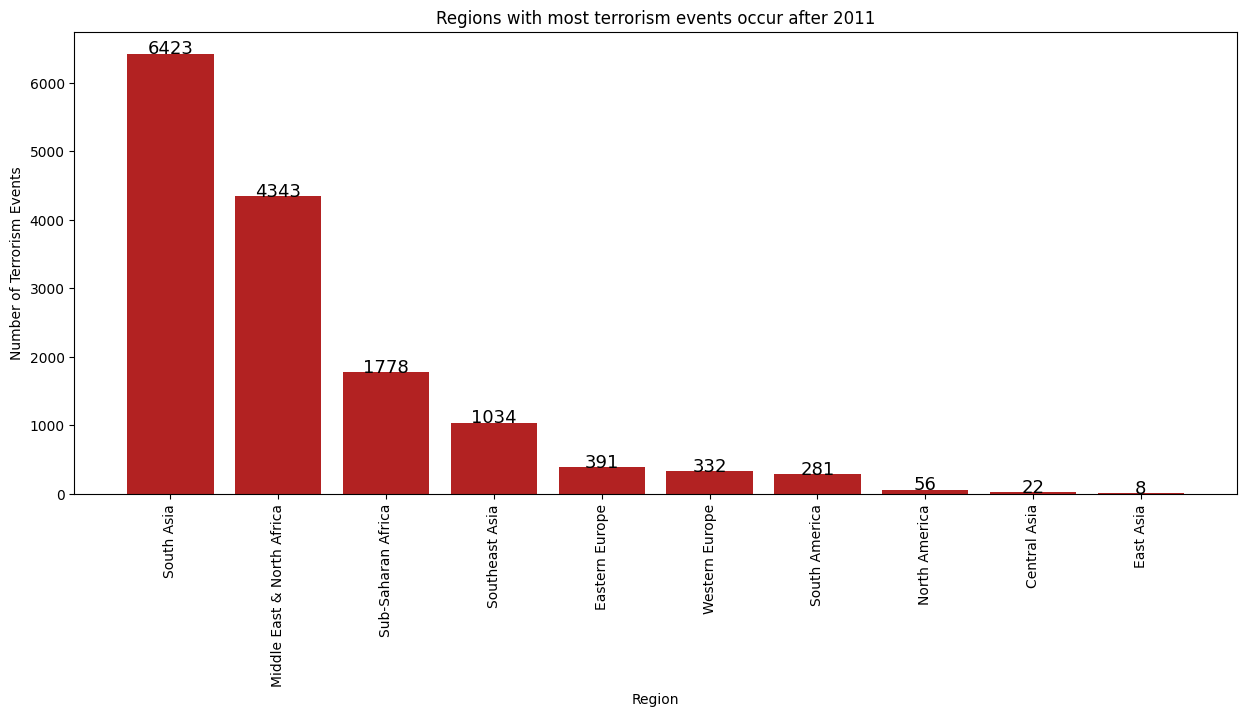

In [57]:
plt.figure(figsize=(15,6))
plt.bar(df_after_2011.region_txt.value_counts()[:10].index,df_after_2011.region_txt.value_counts()[:10].values,color='firebrick')

plt.xlabel('Region')
plt.ylabel('Number of Terrorism Events')
plt.title('Regions with most terrorism events occur after 2011')

plt.xticks(rotation=90)
for i, v in enumerate(df_after_2011.region_txt.value_counts()[:10].values):
    plt.text(df_after_2011.region_txt.value_counts()[:10].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
plt.show()

In [54]:
new_row = pd.DataFrame(data = {
    'region' : ['South Asia','Middle East & North Africa','Other Regions'],
    'value' : [df_after_2011[df_after_2011.region_txt == 'Middle East & North Africa'].shape[0],df_after_2011[df_after_2011.region_txt == 'South Asia'].shape[0],df_after_2011[(df_after_2011.region_txt != 'South Asia') & (df_after_2011.region_txt != 'Middle East & North Africa')].shape[0]]
})
new_row = new_row.set_index('region')
new_row

,value
region,
South Asia,4343
Middle East & North Africa,6423
Other Regions,3906


<Axes: ylabel='value'>

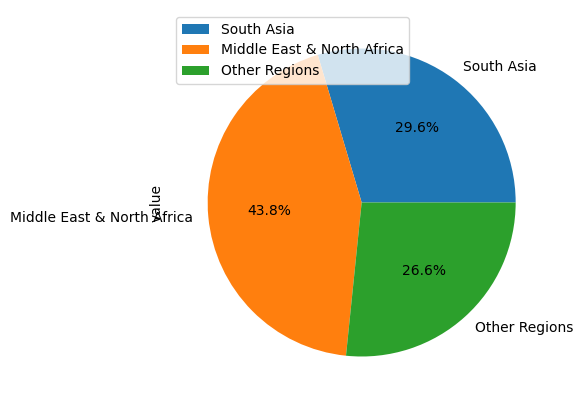

In [56]:
new_row.plot.pie(y='value', figsize=(5, 5),legend = 'region', autopct='%1.1f%%')

LETS COMPARE Terrorism from india and pakistan

In [58]:
df_india = df[df.country_txt == 'India']
df_india.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
1186,197202220004,1972,2,22,India,South Asia,Hijacking,Airports & Aircraft,Palestinians,Explosives,Hijacking DB
2764,197501190004,1975,1,2,India,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Explosives,UMD Encyclopedia of World Terrorism 2012
3857,197605260001,1976,5,26,India,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
5327,197709280004,1977,9,28,India,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,Hijacking DB
7337,197901130004,1979,1,13,India,South Asia,Armed Assault,Police,Naga People,Firearms,PGIS


In [59]:
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
585,197011010001,1970,11,1,Pakistan,South Asia,Assassination,Government (Diplomatic),Unknown,Vehicle (not to include vehicle-borne explosiv...,PGIS
2217,197402020001,1974,2,2,Pakistan,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Firearms,PGIS
2705,197412090001,1974,12,9,Pakistan,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
2744,197500000001,1975,0,0,Pakistan,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
2795,197502080001,1975,2,8,Pakistan,South Asia,Assassination,Government (General),National Awami Party,Firearms,PGIS


YEAR WISE TERRIORIM IN INDIA AND PAKISTAN

In [65]:
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values

iyear
1972      1
1975      1
1976      1
1977      1
1979     20
1980     10
1981     16
1982     13
1983     47
1984    159
1985     39
1986     96
1987    166
1988    358
1989    324
1990    349
1991    339
1992    237
1994    107
1995    179
1996    213
1997    193
1998     61
1999    112
2000    180
2001    234
2002    184
2003    196
2004    108
2005    146
2006    167
2007    149
2008    534
2009    672
2010    663
2011    645
2012    611
2013     73
Name: eventid, dtype: int64

In [66]:
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values

iyear
1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013     254
Name: eventid, dtype: int64

In [67]:
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0


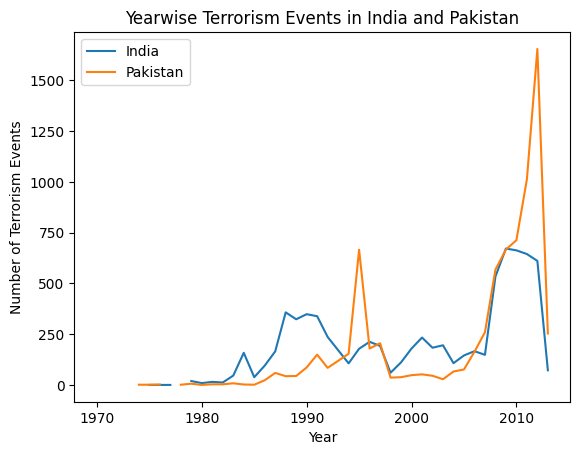

In [68]:
df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()

<h3> Conclusions:

In India, there are some moderate number of attacks around 1990's but after 2007 attacks started rising and after 2011 they kept inrcreasing year by year
In Pakistan, there is spike in 1995 for number of terrorist attacks, but 2011 year was the highest peak where count went more than 1500.

* The Hot Zones of Terrorism are Iraq, India, Colombia
*Regarding the factors like target type,attack type and gang name India and Pakistan have same elements for terrorist attacks such as Private Citizens & Property are mostly targeted and attack is being done with Bombing/Explosion most of the times. And many of gang names for such attacks are Unknown. bold text